<a href="https://colab.research.google.com/github/ashifka/ashif/blob/main/AshifKA(Credit_week3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Loading the dataset

In [8]:
data = pd.read_csv('/content/credit.csv')

# Preprocessing and Exploratory Data Analysis

## **Data Understanding**

In [9]:
data.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


In [10]:
data.shape

(100000, 28)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [12]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [13]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## **Data Cleaning and Visualisation**

In [14]:
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [15]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

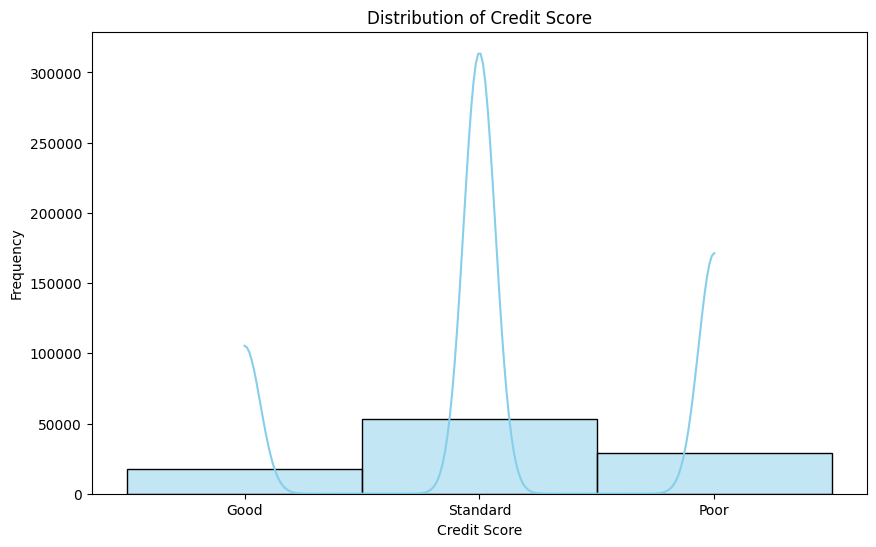

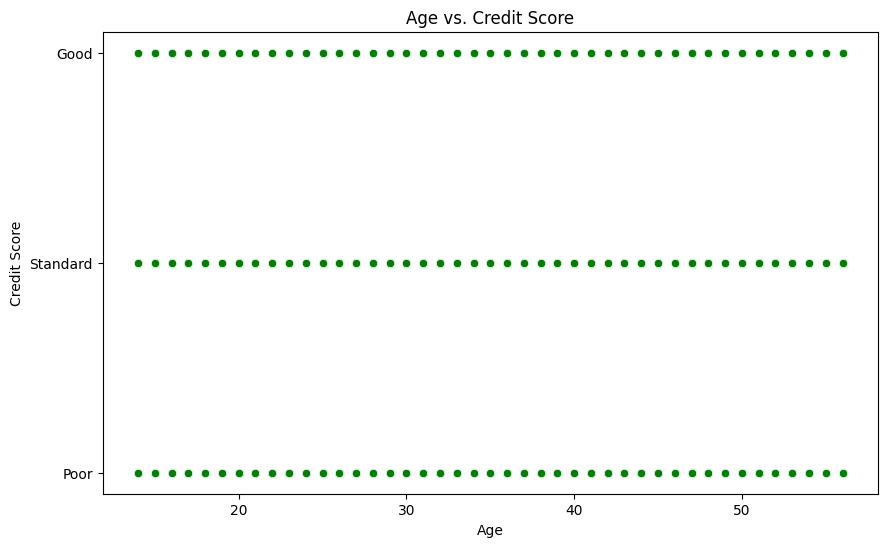

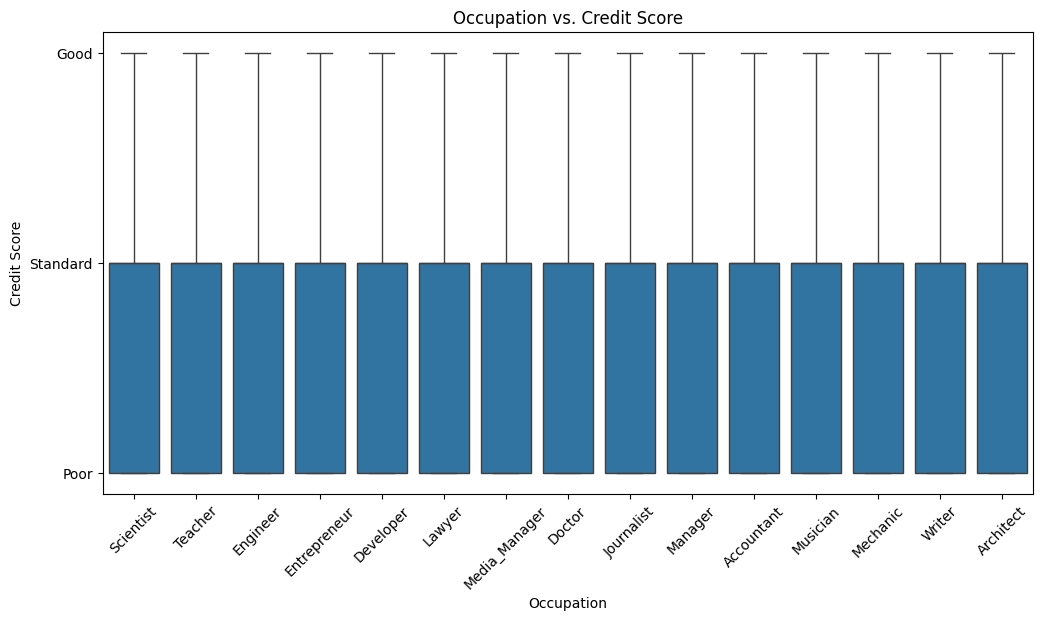

In [16]:
#Visualize the distribution of the credit score
plt.figure(figsize=(10, 6))
sns.histplot(data['Credit_Score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

#Scatter plot of Age vs. Credit Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Credit_Score', color='green')
plt.title('Age vs. Credit Score')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.show()

#Box plot of Occupation vs. Credit Score
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Occupation', y='Credit_Score')
plt.title('Occupation vs. Credit Score')
plt.xlabel('Occupation')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

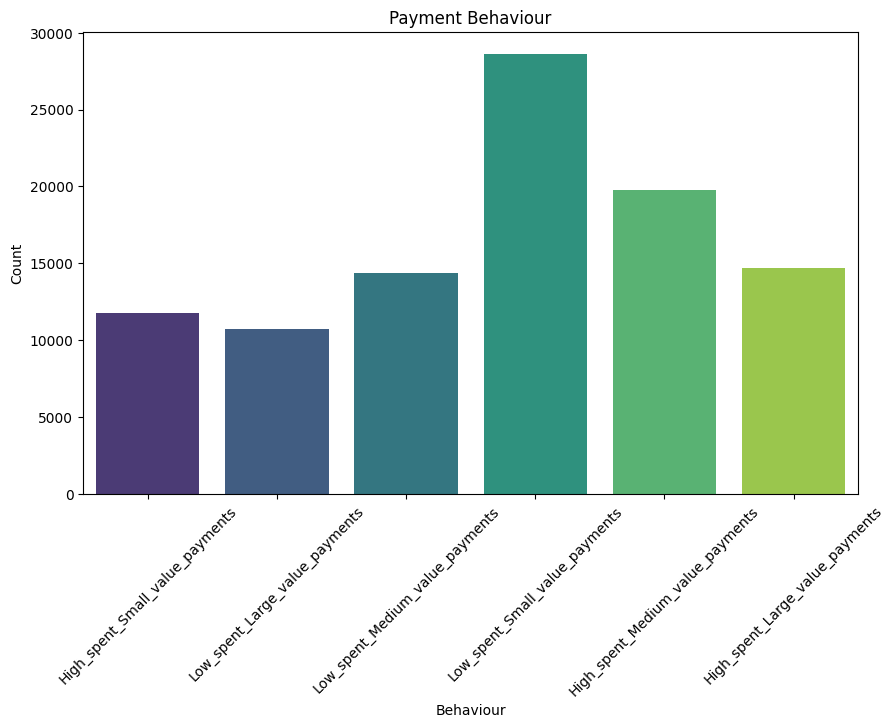

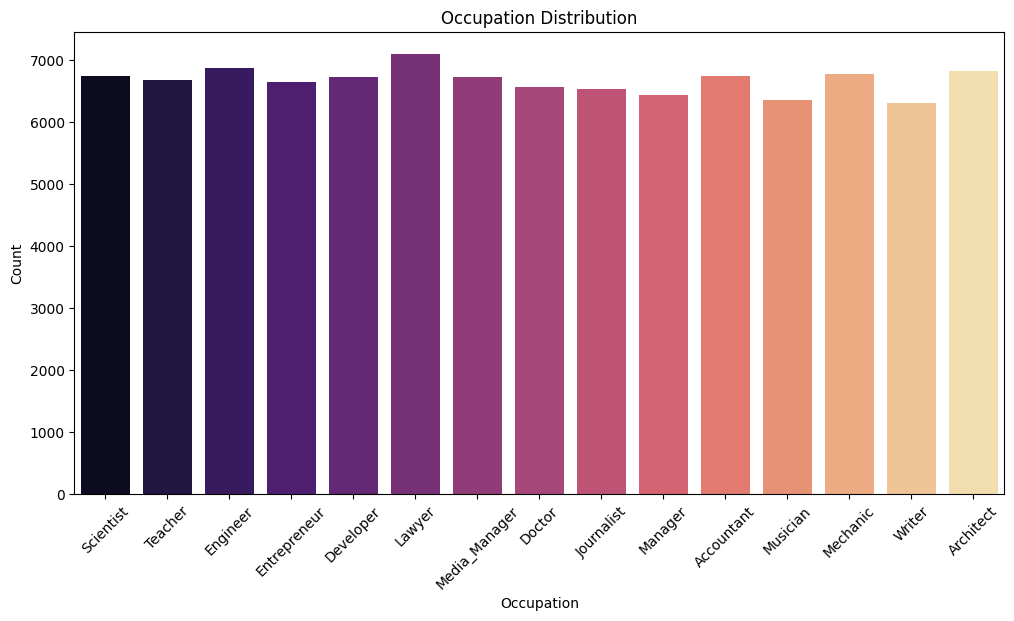

In [17]:
#Count plot of Payment Behaviour
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Payment_Behaviour', hue='Payment_Behaviour', palette='viridis', legend=False)
plt.title('Payment Behaviour')
plt.xlabel('Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Bar plot of Occupation
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Occupation', hue='Occupation', palette='magma', legend=False)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [18]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64

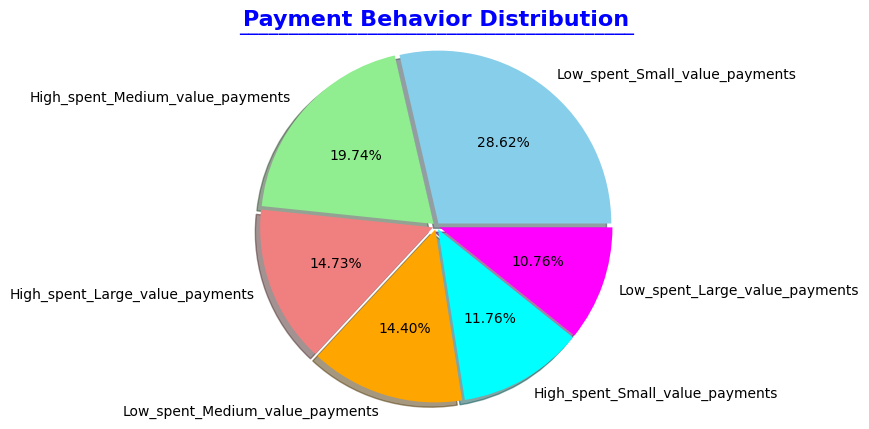

In [19]:
size = data['Payment_Behaviour'].value_counts()
labels = ['Low_spent_Small_value_payments', 'High_spent_Medium_value_payments','High_spent_Large_value_payments',
          'Low_spent_Medium_value_payments','High_spent_Small_value_payments','Low_spent_Large_value_payments']
color = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'cyan', 'magenta']
explode = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

plt.figure(figsize = (5,5))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.axis('equal')
plt.title('Payment Behavior Distribution', fontsize=16, fontweight='bold', color='blue')
plt.text(0.00, 1.16, '_' * 40, horizontalalignment='center', verticalalignment='center', fontsize=14, color='blue')
plt.show()

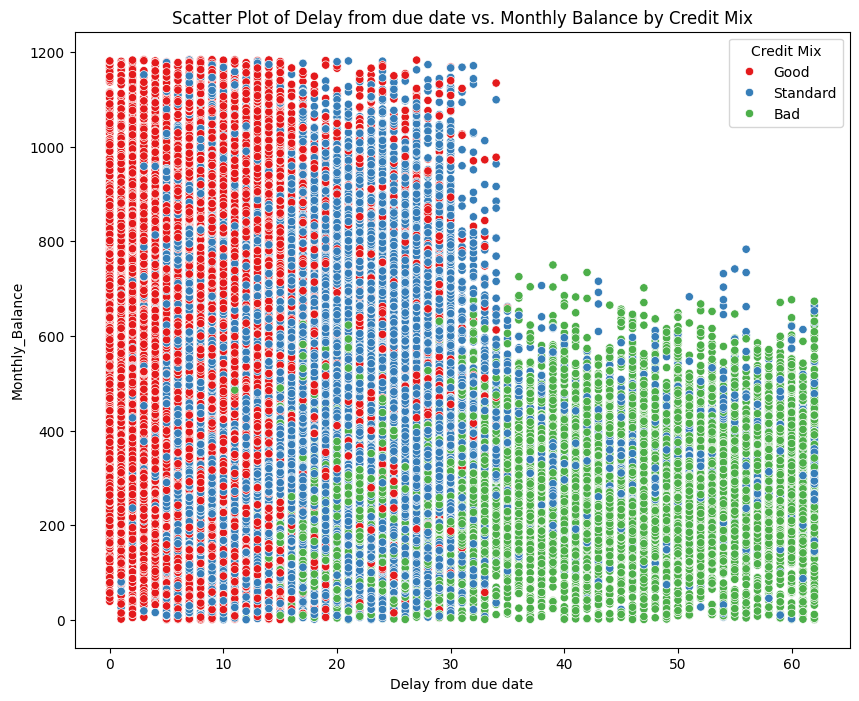

In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Delay_from_due_date', y='Monthly_Balance', hue='Credit_Mix', palette='Set1')
plt.title('Scatter Plot of Delay from due date vs. Monthly Balance by Credit Mix')
plt.xlabel('Delay from due date')
plt.ylabel('Monthly_Balance')
plt.legend(title='Credit Mix', loc='upper right')
plt.show()

## **Data Preprocessing and Feature Engineering**

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

In [22]:
data['Type_of_Loan'].value_counts()

Type_of_Loan
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday 

In [23]:
data['Type_of_Loan'].replace('No Data','Not Specified', inplace = True)

In [24]:
data['Payment_of_Min_Amount'] = label_encoder.fit_transform(data['Payment_of_Min_Amount'])

In [25]:
#Feature Engineering

# Tenure of Employment
retirement_age = 65  # Assumed retirement age
data['Tenure_of_Employment'] = retirement_age - data['Age']

# Total Credit Exposure
data['Total_Credit_Exposure'] = data['Outstanding_Debt'] + data['Total_EMI_per_month'] + data['Changed_Credit_Limit']

# Monthly Balance Ratio
data['Monthly_Balance_Ratio'] = data['Monthly_Balance'] / data['Monthly_Inhand_Salary']

# Monthly Disposable Income
data['Monthly_Disposable_Income'] = data['Monthly_Inhand_Salary'] - (data['Total_EMI_per_month'] + data['Payment_of_Min_Amount'])

# Utilization Ratio
data['Utilization_Ratio'] = data['Credit_Utilization_Ratio'] / data['Num_Credit_Card']

# Credit Score Impact of Delayed Payment
data['Delayed_Payment_Impact'] = data['Num_of_Delayed_Payment'] * data['Delay_from_due_date']

# Type of Loan Encoding
data['Type_of_Loan'] = pd.factorize(data['Type_of_Loan'])[0]

# Interest Rate Adjusted Income
data['Adjusted_Annual_Income'] = data['Annual_Income'] * (1 - data['Interest_Rate'] / 100)

# Drop original columns used for feature engineering
data.drop(['Outstanding_Debt', 'Total_EMI_per_month', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Num_Credit_Card' ,
           'Monthly_Balance', 'Monthly_Inhand_Salary', 'Annual_Income' ,  'Interest_Rate' , 'Total_EMI_per_month' ,
           'Payment_of_Min_Amount' , 'Num_of_Delayed_Payment' , 'Delay_from_due_date'], axis=1, inplace=True)

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
data['Name'] = label_encoder.fit_transform(data['Name'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['Credit_Score'] = label_encoder.fit_transform(data['Credit_Score'])
data['Payment_Behaviour'] = label_encoder.fit_transform(data['Payment_Behaviour'])
data['Credit_Mix'] = label_encoder.fit_transform(data['Credit_Mix'])


In [27]:
# Statistics
#  ANOVA test
# Example: Comparing credit scores among different occupations
f_statistic, p_value3 = stats.f_oneway(*[group['Credit_Score'] for name, group in data.groupby('Occupation')])
print(f"\nANOVA p-value for occupation groups: {p_value3}")


ANOVA p-value for occupation groups: 1.3162496390319872e-11


In [28]:
# Chi-square test
# Testing independence between occupation and payment behaviour

contingency_table = pd.crosstab(data['Occupation'], data['Payment_Behaviour'])
chi2_statistic, p_value, _, _ = stats.chi2_contingency(contingency_table)
print(f"\nChi-square p-value for independence between Occupation and payment behaviour: {p_value}")


Chi-square p-value for independence between Occupation and payment behaviour: 0.014037300779879004


In [29]:

# Pearson correlation coefficient
# Correlation between age and credit score
pearson_corr, pearson_p_value = stats.pearsonr(data['Age'], data['Credit_Score'])
print(f"\nPearson correlation coefficient between age and credit score: {pearson_corr}, p-value: {pearson_p_value}")

# Spearman rank correlation coefficient
# Correlation between monthly balance ratio and credit score
spearman_corr, spearman_p_value = stats.spearmanr(data['Monthly_Balance_Ratio'], data['Credit_Score'])
print(f"\nSpearman rank correlation coefficient between monthly balance ratio and credit score: {spearman_corr}, p-value: {spearman_p_value}")


Pearson correlation coefficient between age and credit score: -0.058922746312646934, p-value: 1.2871238197196371e-77

Spearman rank correlation coefficient between monthly balance ratio and credit score: 0.027126033993890707, p-value: 9.530589935818946e-18




1.   ANOVA (Analysis of Variance) Test:

   
*   P-Value: 1.316×10−11

*   Explanation: The ANOVA test assesses whether the means of a numeric
variable (in this case, 'Credit_Score') differ significantly across groups (in this case, different 'Occupation' groups). The extremely small p-value indicates strong evidence against the null hypothesis, suggesting that at least one group mean is significantly different from the others. Therefore, there is significant variability in credit scores across different occupations.

2.   Chi-square Test:

*   P-Value: 0.014037

*   Explanation: The chi-square test for independence assesses whether there is a significant association between two categorical variables (in this case, 'Occupation' and various categories of 'Payment_Behaviour'). A high p-value indicates that there is no significant association between the two variables. Here, the p-value is quite high (close to 1), suggesting that there is no significant relationship between occupation and payment behavior categories

3. Pearson Correlation Coefficient:



*   Correlation Coefficient: −0.059

*   P-Value: 1.287×10−77

*   Explanation: The Pearson correlation coefficient measures the linear relationship between two continuous variables (here, 'Age' and 'Credit_Score'). The coefficient ranges from -1 to 1, where -1 indicates a perfect negative linear relationship, 0 indicates no linear relationship, and 1 indicates a perfect positive linear relationship. The p-value indicates the probability of observing the correlation coefficient if the true correlation is zero. Here, the correlation coefficient is very close to zero, indicating a very weak linear relationship between age and credit score. However, the extremely low p-value suggests that this weak correlation is statistically significant due to the large sample size.


4.  Spearman Rank Correlation Coefficient:


*   Correlation Coefficient: 0.027

*   P-Value: 9.531×10 −18

*   Explanation: The Spearman rank correlation coefficient assesses the strength and direction of the monotonic relationship between two continuous or ordinal variables. Unlike Pearson correlation, Spearman correlation does not assume a linear relationship. The correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative monotonic relationship, 0 indicates no monotonic relationship, and 1 indicates a perfect positive monotonic relationship. The p-value indicates the probability of observing the correlation coefficient if the true correlation is zero. Here, the correlation coefficient is very close to zero, indicating a very weak monotonic relationship between monthly balance ratio and credit score. However, the extremely low p-value suggests that this weak correlation is statistically significant due to the large sample size


<Axes: >

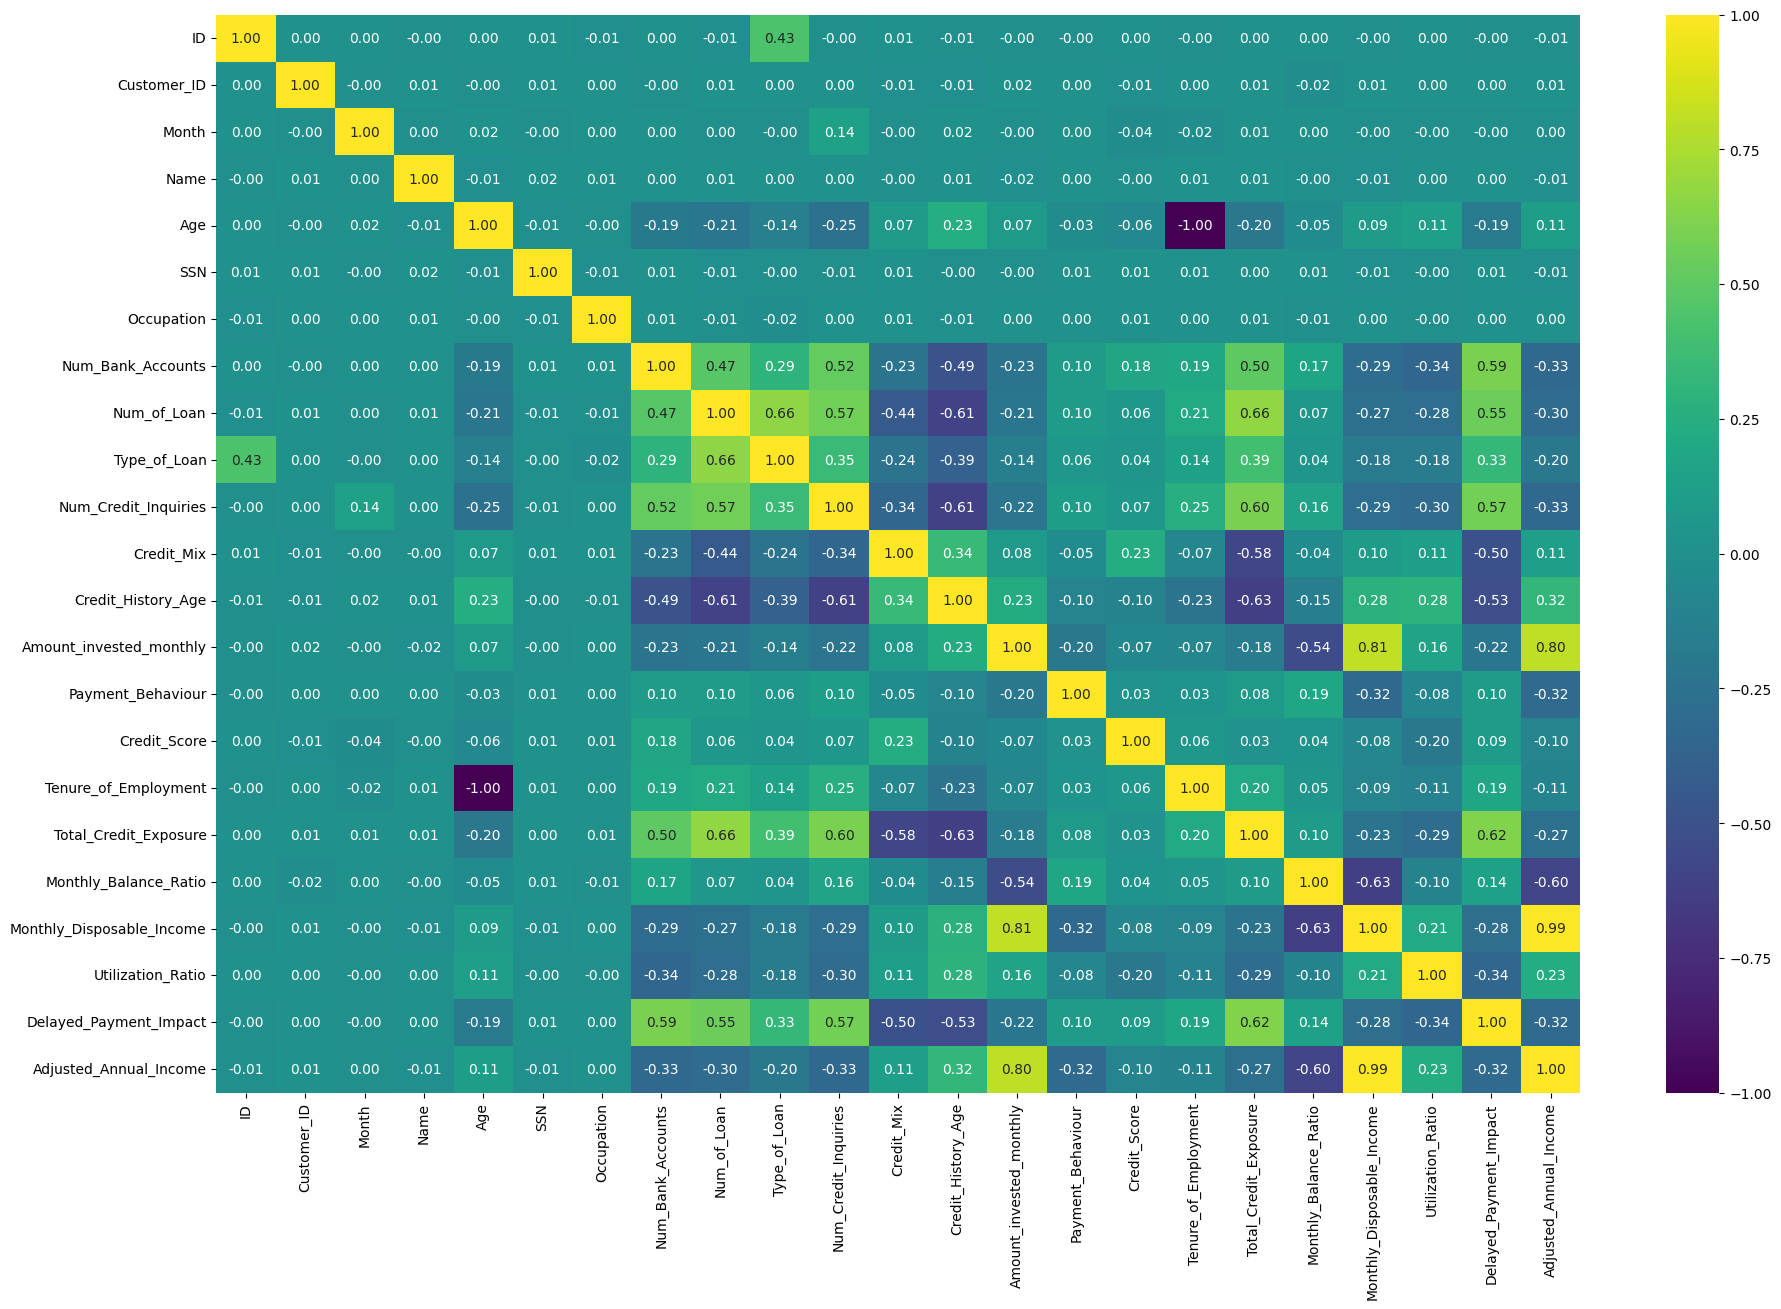

In [30]:
plt.figure(figsize = (22,14))
sns.heatmap(data.corr(), cmap='viridis', annot=True, fmt='.2f')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         100000 non-null  int64  
 1   Customer_ID                100000 non-null  int64  
 2   Month                      100000 non-null  int64  
 3   Name                       100000 non-null  int64  
 4   Age                        100000 non-null  float64
 5   SSN                        100000 non-null  float64
 6   Occupation                 100000 non-null  int64  
 7   Num_Bank_Accounts          100000 non-null  float64
 8   Num_of_Loan                100000 non-null  float64
 9   Type_of_Loan               100000 non-null  int64  
 10  Num_Credit_Inquiries       100000 non-null  float64
 11  Credit_Mix                 100000 non-null  int64  
 12  Credit_History_Age         100000 non-null  float64
 13  Amount_invested_monthly    100

In [32]:
features_to_preprocess = data[[ 'Num_of_Loan', 'Credit_Mix',
                                'Total_Credit_Exposure',
                                'Monthly_Balance_Ratio', 'Delayed_Payment_Impact',
                                'Credit_Score'
                             ]]
features = features_to_preprocess.copy()

In [33]:
features

,Num_of_Loan,Credit_Mix,Total_Credit_Exposure,Monthly_Balance_Ratio,Delayed_Payment_Impact,Credit_Score
0,4.0,1,870.824949,0.171244,21.0,0
1,4.0,1,870.824949,0.155975,12.0,0
2,4.0,1,870.824949,0.181500,21.0,0
3,4.0,1,865.824949,0.122450,20.0,0
4,4.0,1,870.824949,0.187133,24.0,0
...,...,...,...,...,...,...
99995,2.0,1,548.984023,0.142842,161.0,1
99996,2.0,1,548.984023,0.147839,126.0,1
99997,2.0,1,548.984023,0.153839,162.0,1
99998,2.0,1,548.984023,0.095006,120.0,2


In [34]:
scaler = StandardScaler()
features['Total_Credit_Exposure'] = scaler.fit_transform(features['Total_Credit_Exposure'].values.reshape(-1,1))
features['Delayed_Payment_Impact'] = scaler.fit_transform(features['Delayed_Payment_Impact'].values.reshape(-1,1))
features['Num_of_Loan'] = features['Num_of_Loan'].astype(int)

In [35]:
features

,Num_of_Loan,Credit_Mix,Total_Credit_Exposure,Monthly_Balance_Ratio,Delayed_Payment_Impact,Credit_Score
0,4,1,-0.570755,0.171244,-0.959747,0
1,4,1,-0.570755,0.155975,-0.987640,0
2,4,1,-0.570755,0.181500,-0.959747,0
3,4,1,-0.574991,0.122450,-0.962846,0
4,4,1,-0.570755,0.187133,-0.950449,0
...,...,...,...,...,...,...
99995,2,1,-0.843471,0.142842,-0.525854,1
99996,2,1,-0.843471,0.147839,-0.634327,1
99997,2,1,-0.843471,0.153839,-0.522754,1
99998,2,1,-0.843471,0.095006,-0.652922,2


* ## **Creating the Train and Test dataset**

In [36]:
X = features.drop(['Credit_Score'],axis = 1)
y = features['Credit_Score']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)

* ## **Model Selection , Training and Evaluation:**

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
models = {
  'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

In [32]:
max_length = max(len(name) for name in models.keys())
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(f'{name.ljust(max_length)} : Accuracy: {accuracy:.5f}')
    print(f'{"":<{max_length}} : Confusion Matrix:\n{confusion_mat}')
    print("\n")

LogisticRegression     : Accuracy: 0.60272
                       : Confusion Matrix:
[[2245   85 2092]
 [ 596 3443 3274]
 [1607 2278 9380]]


SVC                    : Accuracy: 0.65008
                       : Confusion Matrix:
[[3681   96  645]
 [1192 4309 1812]
 [2626 2377 8262]]


RandomForestClassifier : Accuracy: 0.73264
                       : Confusion Matrix:
[[ 2890   136  1396]
 [  358  5219  1736]
 [ 1335  1723 10207]]


DecisionTreeClassifier : Accuracy: 0.67364
                       : Confusion Matrix:
[[2546  330 1546]
 [ 318 4813 2182]
 [1591 2192 9482]]




## **Hyperparameter Tuning**

In [44]:
from sklearn.model_selection import  RandomizedSearchCV, cross_val_score, ParameterSampler
from scipy.stats.distributions import expon, uniform

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy of Logistic Regression: 0.60264
Best Estimator: LogisticRegression(C=100)


<Figure size 800x600 with 0 Axes>

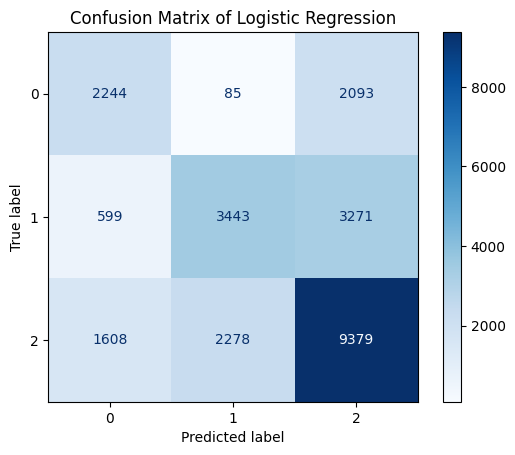

In [45]:

# Logistic Regression
logistic_params = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

logistic_model = LogisticRegression()
logistic_random_search = RandomizedSearchCV(estimator=logistic_model, param_distributions=logistic_params, n_iter=50, verbose=1, n_jobs=-1)
logistic_random_search.fit(X_train, y_train)

logistic_best_parameter = logistic_random_search.best_params_
logistic_best_model = logistic_random_search.best_estimator_

logistic_pred = logistic_best_model.predict(X_test)
logistic_score = accuracy_score(y_test, logistic_pred)

logistic_class_labels = np.unique(y_test)
logistic_matrix = confusion_matrix(y_test, logistic_pred)

print("Accuracy of Logistic Regression:", logistic_score)
print("Best Estimator:", logistic_best_model)

plt.figure(figsize=(8, 6))
logistic_disp = ConfusionMatrixDisplay(confusion_matrix=logistic_matrix, display_labels=logistic_class_labels)
logistic_disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Accuracy of Decision Tree: 0.67568
Best Estimator: DecisionTreeClassifier(max_depth=15, min_samples_split=5)


<Figure size 800x600 with 0 Axes>

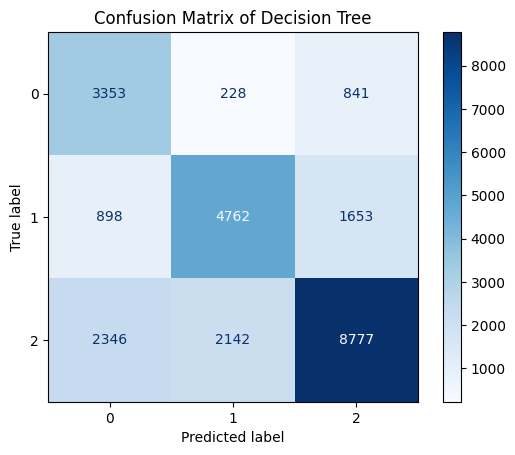

In [40]:
# Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier()
dt_random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=dt_params, n_iter=50, verbose=1, n_jobs=-1)
dt_random_search.fit(X_train, y_train)

dt_best_parameter = dt_random_search.best_params_
dt_best_model = dt_random_search.best_estimator_

dt_pred = dt_best_model.predict(X_test)
dt_score = accuracy_score(y_test, dt_pred)

dt_class_labels = np.unique(y_test)
dt_matrix = confusion_matrix(y_test, dt_pred)

print("Accuracy of Decision Tree:", dt_score)
print("Best Estimator:", dt_best_model)

plt.figure(figsize=(8, 6))
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_matrix, display_labels=dt_class_labels)
dt_disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Accuracy of Random Forest: 0.73972
Best Estimator: RandomForestClassifier(min_samples_leaf=2, n_estimators=200)


<Figure size 800x600 with 0 Axes>

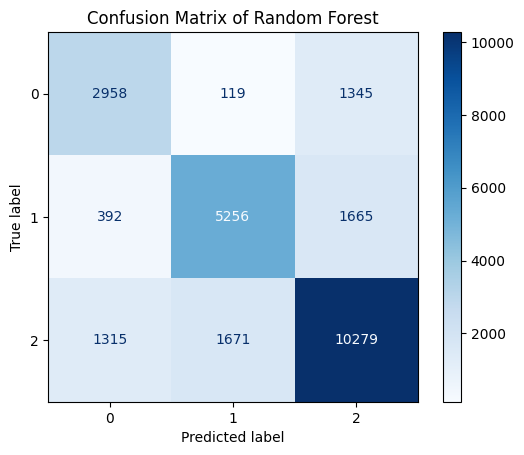

In [41]:
# Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

rf_model = RandomForestClassifier()
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_params, n_iter=50, verbose=1, n_jobs=-1)
rf_random_search.fit(X_train, y_train)

rf_best_parameter = rf_random_search.best_params_
rf_best_model = rf_random_search.best_estimator_

rf_pred = rf_best_model.predict(X_test)
rf_score = accuracy_score(y_test, rf_pred)

rf_class_labels = np.unique(y_test)
rf_matrix = confusion_matrix(y_test, rf_pred)

print("Accuracy of Random Forest:", rf_score)
print("Best Estimator:", rf_best_model)

plt.figure(figsize=(8, 6))
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_matrix, display_labels=rf_class_labels)
rf_disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix of Random Forest')
plt.show()

In [49]:
import pickle

pickle.dump(rf_best_model, open('rf_bestmodel.pkl', 'wb'))
#label encoder
pickle.dump(label_encoder,open('l_encoder.pkl','wb'))
#scalar
pickle.dump(scaler,open('std_scalar.pkl','wb'))